# Полиномиальная регрессия
---
**Выполнила:** Халфина Айсылу Зуфаровна

**Группа:** НПМбд-02-19

---

Дана сложная математическая функция на отрезке $x\in[1, 15]$

$f(x)=sin\frac{x}{5}\cdot e^{\frac{x}{10}}+5e^{-\frac{1}{2}x}$

Первым шагом визуализируем эту функцию. Для этого будем использовать библиотеки **numpy**, а также модкль **pyplot** из библиотеки **matplotlib**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Следующим шагом определим нашу функцию.

In [2]:
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)

После этого приступим к построению графика.

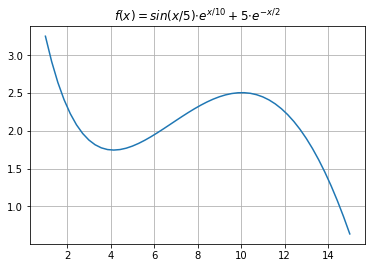

In [3]:
x = np.linspace(1, 15)
y = f(x)
plt.title("$f(x) = sin(x/5) ⋅ e^{x/10} + 5 ⋅ e^{-x/2}$")
plt.plot(x, y)
plt.grid(True)

Задача состоит в том, чтобы приблизить сложную зависимость с помощью функции из 
определенного семейства. В этом задании мы будем приближать указанную функцию с 
помощью многочленов

## Полиномиальная регрессия

Воспользуемся описанным свойством и будем находить приближение функции 
многочленом, решая систему линейных уравнений.

Напишем функцию построения графика точек, по которым строится многочлен.

In [4]:
def dotPlot(n):
    dots = np.linspace(1, 15, n)
    powers = range(n)
    A = []
    for dot in dots:
        A.append(np.power(dot, powers))
    b = f(dots)
    W = np.linalg.solve(A, b)
    B = []
    for i in dots:
        B.append(np.sum(W * np.power(i, powers)))
    fig, (plot1, plot2) = plt.subplots(2, sharex=True)
    plot1.set_title("f(x)")
    plot1.plot(dots, f(dots), "co")
    plot1.grid(True)
    plot2.set_title("многочлен")
    plot2.plot(dots, B, "mo")
    plot2.grid(True)
    
    return W

Затем напишем функцию построения графика аппроксимации

In [5]:
def plot(w, n):
    powers = range(n)
    approx = [np.sum(w * np.power(i, powers)) for i in x]
    plt.plot(x, approx, "c")
    plt.plot(x, y, "m")
    plt.grid(True)

Построим графики для $n = 5$

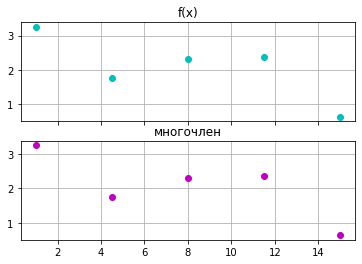

In [6]:
W = dotPlot(5)

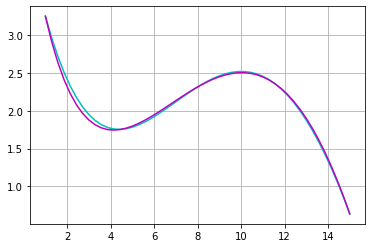

In [7]:
plot(W, 5)

Затем построим графики для $n = 15$

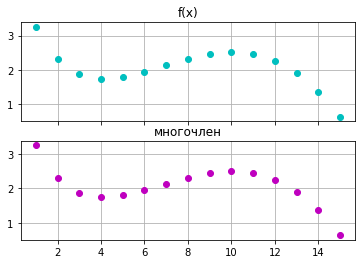

In [8]:
W = dotPlot(15)

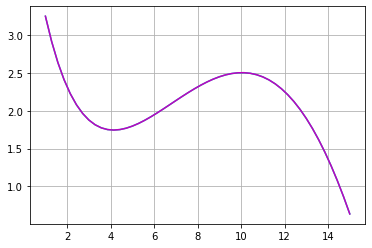

In [9]:
plot(W, 15)

По графикам видно, что с ростом степени многочлена увеличивается и точность приближения. При $n = 5$ расхождение на графике всё ещё заметно, а при $n = 15$ его уже нет.

## Полиномиальная регрессия с зашумлённым данными

Рассмотрим случай, когда значение функции $f$ известно с некоторой неточностью. Для этого добавим к значению функции случайный шум. Шум сгенерируем из гауссового распределения с нулевым средним и стандартным отклонением $\sigma = 0.01$

In [10]:
def dotPlotWithNoise(n):
    dots = np.linspace(1, 15, n)
    powers = range(n)
    A = []
    for dot in dots:
        A.append(np.power(dot, powers))
    b = f(dots) + np.random.normal(0, 0.01, n)
    W = np.linalg.solve(A, b)
    B = []
    for i in dots:
        B.append(np.sum(W * np.power(i, powers)))
    fig, (plot1, plot2) = plt.subplots(2, sharex=True)
    plot1.set_title("f(x)")
    plot1.plot(dots, f(dots), "co")
    plot1.grid(True)
    plot2.set_title("многочлен")
    plot2.plot(dots, B, "mo")
    plot2.grid(True)
    
    return W

Так же построим графики для $n = 5$

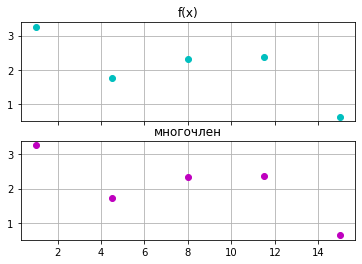

In [11]:
W = dotPlotWithNoise(5)

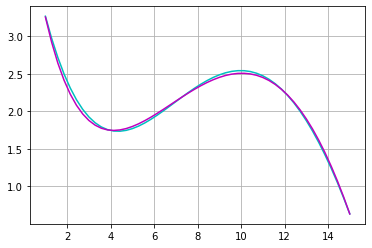

In [12]:
plot(W, 5)

И для $n = 15$

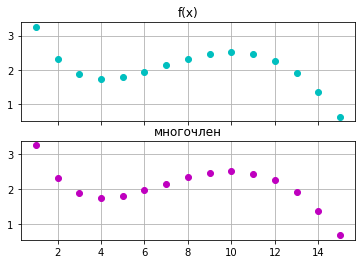

In [13]:
W = dotPlotWithNoise(15)

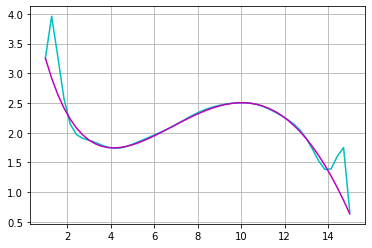

In [14]:
plot(W, 15)

При добавлении шума можно заметить, что точность приближения при малой степени многочлена практически не изменилась по сравнению с вариантом без шума. Однако при увеличении степени его влияние заметно сильнее и график аппроксимации теряет свою точность.

## Метод наименьших квадратов

Возьмём $N = 100$ точек. Добавим шум с коэффициентом $\sigma = 0.1$ и построим кубический полином методом наименьших квадратов.

In [15]:
def dotPlotSqr(n):
    dots = np.linspace(1, 15, 100)
    powers = range(n)
    A = []
    for dot in dots:
        A.append(np.power(dot, powers))
    A = np.array(A)
    b = f(dots) + np.random.normal(0, 0.1, 100)
    W, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
    B = []
    for i in dots:
        B.append(np.sum(W * np.power(i, powers)))
    fig, (plot1, plot2) = plt.subplots(2, sharex=True)
    plot1.set_title("f(x)")
    plot1.plot(dots, f(dots), "co")
    plot1.grid(True)
    plot2.set_title("многочлен")
    plot2.plot(dots, B, "mo")
    plot2.grid(True)
    
    return W

$n = 5$

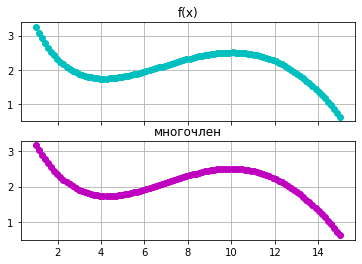

In [16]:
W = dotPlotSqr(5)

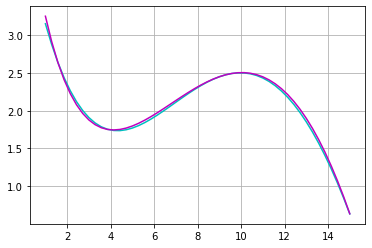

In [17]:
plot(W, 5)

$n = 10$

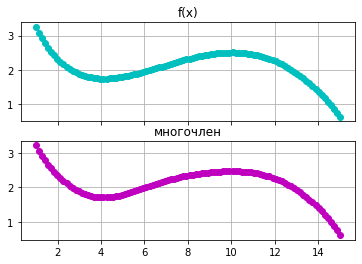

In [18]:
W = dotPlotSqr(10)

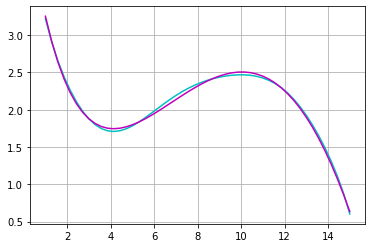

In [19]:
plot(W, 10)

При аппроксимации многочленом функции с использованием метода полиномиальной регрессии мы строим график многочлена по количеству точек, совпадающему с его степенью. При использовании метода наименьших квадратов мы можем использовать степень многочлена меньшую, чем количество точек. 